<p align="center" ><img src="https://www.ai4kids.ai/wp-content/uploads/2019/07/ai4kids_website_logo_120x40.png"></img></p>

# 學AI真簡單 <1> 初探機器學習
## 第三章 動手實作監督式學習 
### 3-2 線性迴歸介紹與應用

<p align="right">© Copyright AI4kids.ai</p>

## 這是一個關於糖尿病的資料集，此數據描述了患者一年以後糖尿病的惡化程度，總共有442個樣本，每個樣本10個屬性，分別是age年齡，sex性別，bmi身高體重比，bp血壓以及六種血清的化驗數據。

bmi = body mass index:身體品質指數，是衡量是否肥胖和標準體重的重要指標，理想BMI  (18.5～ 24) = 體重(單位Kg) ÷ 身高的平方 (單位m)

樣本矩陣x共有442行，10列，而我們的y就是糖尿病惡化程度的量化，是一個442維的向量。


# 1. 載入所需套件

In [ ]:
from sklearn import datasets    # scikit-learn 機器學習的套件，包含內建的分群分類計算、回歸、統計等功能 

# 載入我們會用到的模型，線性回歸模型
from sklearn.linear_model import LinearRegression

# 載入切分資料集成訓練集及測試集的套件，train_test_split
from sklearn.model_selection import train_test_split

# 載入驗證模型的套件，mean_square_error
from sklearn.metrics import mean_squared_error
# 均方誤差（Mean squared error，簡稱:MSE），數值越小，說明預測模型具有更好的精確度 



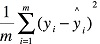

In [ ]:
import numpy as np        #是主要用於資料處理上,支援非常多的科學計算，包含矩陣運算、線性代數、傅立葉轉換等。
import pandas as pd        #提供特殊資料結構，具有數據處理和資料分析的功能
import matplotlib.pyplot as plt  #資料視覺化,可以畫出各種圖型如長條圖、分佈圖、立體圖等 
import seaborn as sns       #資料視覺化:個基於 matplotlib 庫的高階 API。還有豐富的視覺化庫，包括一些複雜型別，如時間序列、聯合分佈圖(jointplots)和小提琴圖(violin diagrams)。



# 2. 載入資料集，觀察資料集

In [ ]:
# 載入糖尿病資料集，放到 my_data變數內
my_data = datasets.load_diabetes()

#datasets.load_iris()

In [ ]:
#dictionary - 字典
#{key:value}
dic_test = {"apple":"蘋果", "banana":"香蕉"}
print(dic_test["apple"])

list_test = ["蘋果", "香蕉"]
print(list_test[0])

蘋果
蘋果


In [ ]:
# 直接觀察有哪些 key 在資料集內
print(my_data.keys())

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


data： 特徵值

target：一年後患疾病的定量指標 

feature_names： 特徵名稱

DESCR： 這個資料集的描述

In [ ]:
my_data

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/

In [ ]:
print(my_data["data"])

#normalization or standardlization(VV)
#age bmi ....
#30  24 .....  => 30-mu/sigma 24-mu/sigma .....
#60  40 ....

#已經前處理完畢 不需要自己處理！！

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


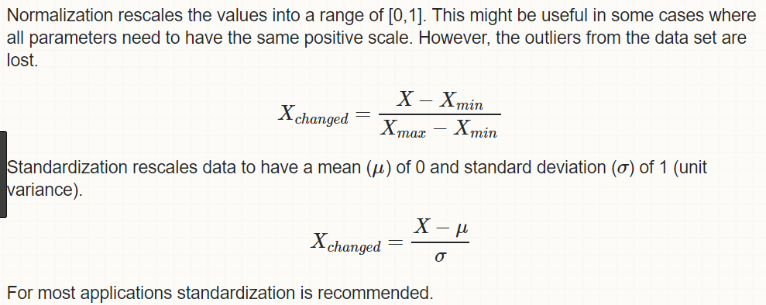

In [ ]:
print(my_data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [ ]:
#shape的功能
list_test = np.array([1, 2, 3])
list_test2 = np.array([[1, 2], [3, 4], [5, 6]])
list_test3 = np.array([[1], [2], [3]])
list_test4 = np.array([])

print(list_test.shape)
print(list_test2.shape)
print(list_test3.shape)
print(list_test4.shape)

(3,)
(3, 2)
(3, 1)
(0,)


In [ ]:
# 觀察資料筆數
print("資料筆數:")
print(my_data.data.shape)
print("資料有442筆（也就是442個人的資料），每個資料有10個特徵（年齡、身高體重...）")
print("\n")

# 觀察我們資料的欄位名稱
print("資料的欄位名稱，分別是:")
print(my_data.feature_names)
print("\n")

# 觀察我們第一筆的資料內容
print("第一筆的資料內容:")
print(my_data.data[0])
print("\n")

# 觀察我們第一筆的預測目標
print("第一筆的預測目標:")
print(my_data.target[0])
print("\n")

print("機器學習的目標：\n用",my_data.data[0],"放進模型，要預測出糖尿病惡化指數為",my_data.target[0])


資料筆數:
(442, 10)
資料有442筆（也就是442個人的資料），每個資料有10個特徵（年齡、身高體重...）


資料的欄位名稱，分別是:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


第一筆的資料內容:
[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]


第一筆的預測目標:
151.0


機器學習的目標：
用 [ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613] 放進模型，要預測出糖尿病惡化指數為 151.0


In [ ]:
#第一筆資料的第一個特徵值
print(my_data.data[0][0])

#list:[A, B, C, D...]
list_test = [1, 2, 3, 4]
print("list_test[0]:",list_test[0])

list_test2 = [[1, 2], [3, 4], [5, 6]]
print("list_test2[1]:",list_test2[1])
print("list_test2[1][0]:",list_test2[1][0])

0.0380759064334241
list_test[0]: 1
list_test2[1]: [3, 4]
list_test2[1][0]: 3


## 轉換成 DataFrame 格式


In [ ]:
print(type(my_data.data))

<class 'numpy.ndarray'>


In [ ]:
#資料轉成DataFrame
df = pd.DataFrame(my_data.data, columns = my_data.feature_names)
df['target'] = my_data.target

#[A:B] 包含Ａ不包含B
print(df[0:99])

         age       sex       bmi  ...        s5        s6  target
0   0.038076  0.050680  0.061696  ...  0.019908 -0.017646   151.0
1  -0.001882 -0.044642 -0.051474  ... -0.068330 -0.092204    75.0
2   0.085299  0.050680  0.044451  ...  0.002864 -0.025930   141.0
3  -0.089063 -0.044642 -0.011595  ...  0.022692 -0.009362   206.0
4   0.005383 -0.044642 -0.036385  ... -0.031991 -0.046641   135.0
..       ...       ...       ...  ...       ...       ...     ...
94 -0.078165 -0.044642 -0.016984  ... -0.041180 -0.092204    90.0
95 -0.070900 -0.044642 -0.057941  ...  0.001144 -0.005220   162.0
96  0.056239  0.050680  0.009961  ...  0.060788  0.032059   150.0
97 -0.027310 -0.044642  0.088642  ...  0.002864  0.077622   279.0
98  0.001751  0.050680 -0.005128  ... -0.006080 -0.067351    92.0

[99 rows x 11 columns]


In [ ]:
#第0個人的所有資料
print(df.iloc[0])

#空一行
print()

#第一個column(age column)的第0筆資料
print(df["age"][0])

#空一行
print("\n")

#age sex 這兩個column
print(df[["age", "sex"]])

#空一行
print()

#age sex 這兩個column 的第0個~第21個人的資料
print(df[["age", "sex"]].iloc[0:22])

age         0.038076
sex         0.050680
bmi         0.061696
bp          0.021872
s1         -0.044223
s2         -0.034821
s3         -0.043401
s4         -0.002592
s5          0.019908
s6         -0.017646
target    151.000000
Name: 0, dtype: float64

0.0380759064334241


          age       sex
0    0.038076  0.050680
1   -0.001882 -0.044642
2    0.085299  0.050680
3   -0.089063 -0.044642
4    0.005383 -0.044642
..        ...       ...
437  0.041708  0.050680
438 -0.005515  0.050680
439  0.041708  0.050680
440 -0.045472 -0.044642
441 -0.045472 -0.044642

[442 rows x 2 columns]

         age       sex
0   0.038076  0.050680
1  -0.001882 -0.044642
2   0.085299  0.050680
3  -0.089063 -0.044642
4   0.005383 -0.044642
5  -0.092695 -0.044642
6  -0.045472  0.050680
7   0.063504  0.050680
8   0.041708  0.050680
9  -0.070900 -0.044642
10 -0.096328 -0.044642
11  0.027178  0.050680
12  0.016281 -0.044642
13  0.005383  0.050680
14  0.045341 -0.044642
15 -0.052738  0.050680
16 -0.005515 -0.044

In [ ]:
#看看數據集的訊息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [ ]:
#預設是5筆
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


# 看看是否有缺失值

In [ ]:
#是否有空值
#沒有缺失值不需要做處理
#但是如果有缺失值，就要去把缺失的值補起來，或者直接把那個人的所有資料刪掉，不要放進模型訓練
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

## 我們來看看每個變數（特徵）之間的關係，透過相關係係數去觀察有哪些特徵變數和目標變數有較高的相關性，每個特徵間的關係如何

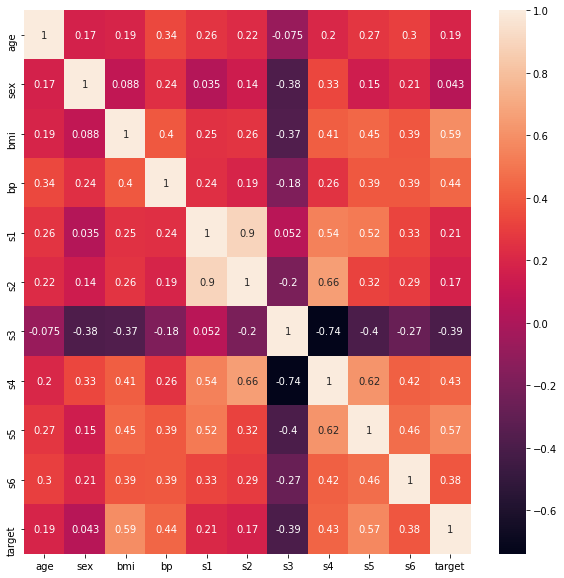

In [ ]:
plt.figure(figsize=(10, 10))    #創建一個畫布，大小是10x10
correlation = df.corr()        #觀察每個特徵間的關聯性，越相關會越接近一（ex.性別與跟高正相關）
sns.heatmap(correlation,annot=True) #annot=True代表顯示數字 
#在這一步，如果特徵太多，判斷哪些特徵可以刪除，如果沒什麼關係，就可以刪掉。
#判斷標準：關聯性取絕對值，絕對值得值越大，就越有關聯，可以放入作為特徵訓練

方格的顏色越淺(正相關)或顏色越深(負相關)，相關程度越高。

我們可以注意到一個有趣的事實：我們所關注的年齡和糖尿病惡化程度的相關度只有0.19，

而s1與s2的相關度，高達0.9，小小技巧：兩者呈現出很強的線性關係！可以判斷有多餘的特徵，我們只需要保留其中一個。

通過檢驗特徵之間的相關度來找出多餘特徵，通過檢驗特徵與目標的相關度來找出無關特徵。



# 切分資料集 - 訓練集 / 測試集


In [ ]:
# 我們將樣本資料隨機排序 (Shuffle) 後將資料切分成兩組，把80%當成訓練集，20%當成測試集
# (train_x, train_y) 為80%的訓練集，用來訓練模型
# (test_x , test_y ) 為20%的測試集，用來驗證模型的預測能力

X_train = df.drop(["target"], axis=1)   #預設是axis=0會是row(列)，他會刪除row的資料（也就是第幾個人的資料）
                                        #axis=1會是column(行)(ex.target那整個欄位）
Y_train = df['target'] 

print(X_train)
print(Y_train)

          age       sex       bmi  ...        s4        s5        s6
0    0.038076  0.050680  0.061696  ... -0.002592  0.019908 -0.017646
1   -0.001882 -0.044642 -0.051474  ... -0.039493 -0.068330 -0.092204
2    0.085299  0.050680  0.044451  ... -0.002592  0.002864 -0.025930
3   -0.089063 -0.044642 -0.011595  ...  0.034309  0.022692 -0.009362
4    0.005383 -0.044642 -0.036385  ... -0.002592 -0.031991 -0.046641
..        ...       ...       ...  ...       ...       ...       ...
437  0.041708  0.050680  0.019662  ... -0.002592  0.031193  0.007207
438 -0.005515  0.050680 -0.015906  ...  0.034309 -0.018118  0.044485
439  0.041708  0.050680 -0.015906  ... -0.011080 -0.046879  0.015491
440 -0.045472 -0.044642  0.039062  ...  0.026560  0.044528 -0.025930
441 -0.045472 -0.044642 -0.073030  ... -0.039493 -0.004220  0.003064

[442 rows x 10 columns]
0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name

In [ ]:
#分割資料
train_x, test_x, train_y, test_y = train_test_split(
           X_train, Y_train, random_state = 41, test_size = 0.1185, shuffle=True)

#random seed 隨機亂數的種子 random(random seed = 1) = [625, 4, 0, 1, ...]
#                         random(random seed = 0) = [7, 48, 45, 10, ...]
#通常在電腦裡要達到真正隨機亂數的話，會執行random(time)，我現在是幾點，就將目前時間作為random seed，放入random函式   

# 可以看一下這些資料集的維度，驗證沒有切錯
print("原始資料集的維度大小:" , my_data.data.shape)
print("訓練集的維度大小:   " , train_x.shape)
print("測試集的維度大小:   " , test_x.shape)

原始資料集的維度大小: (442, 10)
訓練集的維度大小:    (389, 10)
測試集的維度大小:    (53, 10)


In [ ]:
#train_tx = train)x

SyntaxError: ignored

# 訓練模型及驗證模型

In [ ]:
# 把預先載入好的套件「線性回歸模型」拿出來使用，並且存到變數my_model中
my_model = LinearRegression()

# 訓練模型，放入要訓練的訓練集(train_x, train_y)
# f(x0_1, x0_2, x0_3, ...., x0_10) = y0'    模型要找出最佳的f(x)，使y0'與y0越來越符合
# f(x1_1, x1_2, x1_3, ...., x1_10) = y1'    模型要找出最佳的f(x)，使y1'與y1越來越符合
# ...
# f(x441_1, x441_2, x441_3, ...., x441_10) = y441'    模型要找出最佳的f(x)，使y441'與y441越來越符合
my_model.fit(train_x, train_y)

# 訓練完模型後，我們就可以用 my_model 來預測測試集，產生出我們的預測值，存到 pred 變數內

pred = my_model.predict(test_x)   #把test_x放進model求得的最佳f(x)算出pred_y

# 接著就可以使用我們的評估指標 MSE (mean_squared_error) 來評估我們模型
# 注意MSE分數是越接近 0 越好，代表預測的值與真實答案相差無幾

score_mse = mean_squared_error(pred, test_y)
score_rmse = np.sqrt(((pred - test_y) ** 2).mean())

print("模型評估完測試集的MSE: ", score_mse)
print("模型評估完測試集的RMSE: ", score_rmse)

模型評估完測試集的MSE:  2451.247249231154
模型評估完測試集的RMSE:  49.51007219981762


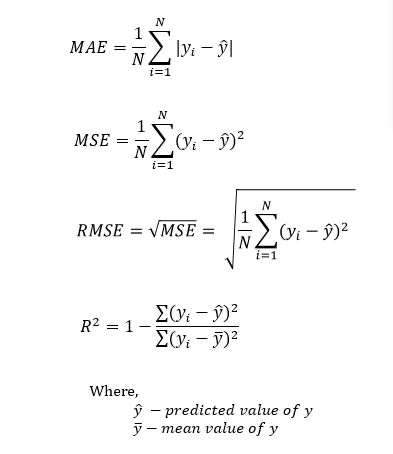

## 視覺化呈現預測結果

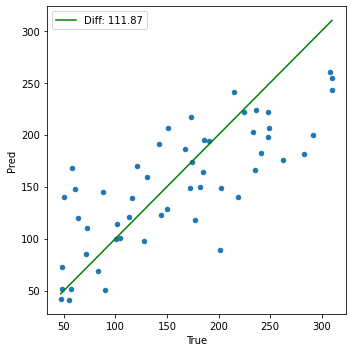

In [ ]:
import matplotlib.pyplot as plt

#y_pred = model.predict(test_x)
plt.figure(figsize=(5,5))   #宣告一個畫布，大小為5x5

plt.scatter(test_y, pred, s=20)   #畫出散點圖 （x值為原始資料，y值為預測資料，當x=y時會在y=x直線上）, s是size
#(x, y)
#(test_y0, pred0)
#(test_y1, pred1)
#...
#(test_y52, pred52)

plt.ylabel('Pred')      #我要在y軸上取名為Pred
plt.xlabel('True')      #我要在x軸上取名為True
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='green',label='Diff: '+str(round(max(abs(test_y - pred)),2)))  #畫布大小，diff:絕對誤差(取到小數第二位)
plt.legend(loc='upper left')   #label顯示在左上角 
plt.tight_layout()   #自動調整繪圖區的大小、間距，使其不重疊．

### Q: 那麼可以不要使用全部的10個特徵來訓練模型嗎?  結果分數如何？

In [ ]:
# 挑選其中的 4個特徵
# 這裡的 , 前面如果填上數字代表著要哪些列(橫向), 填上 : 就是從最前面到最後面, 也就是全部都要
# 而, 後面代表著挑選哪些行(直向), 也就是特徵, 所以直接填上數字代表你要挑選特徵欄位的位置
train_x_f4 = train_x.iloc[:, [3,8]]
test_x_f4  = test_x.iloc[:, [3,8]] 


# 以下的程式碼與上一段的程式碼大同小異
# 大家可以練習看看，但是注意 train_x, train_y, test_x, test_y 的位置要放對哦!
model_f4 = LinearRegression()
model_f4.fit(train_x_f4, train_y)

pred = model_f4.predict(test_x_f4)

# 最後可以看看這次的預測分數如何，與上一段的分數做比較
score_mse = mean_squared_error(pred, test_y)
score_rmse = np.sqrt(((pred - test_y) ** 2).mean())

print("模型評估完測試集的MSE: ", score_mse)
print("模型評估完測試集的RMSE: ", score_rmse)


模型評估完測試集的MSE:  2532.5529647263024
模型評估完測試集的RMSE:  50.32447679535579
